In [182]:
# In a new session or notebook, you can retrieve all variables
%store -r

Unable to restore variable 'all_vars', ignoring (use %store -d to forget!)
The error was: <class 'KeyError'>
Unable to restore variable 'F', ignoring (use %store -d to forget!)
The error was: <class 'KeyError'>


In [183]:
import pandas as pd

In [184]:
from transformers import pipeline

### Sentiment recognition

In [185]:
classifier=pipeline('text-classification')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [186]:
text = """Dear Amazon, last week I ordered an Optimus Prime action figure \
from your online store in Germany. Unfortunately, when I opened the package, \
I discovered to my horror that I had been sent an action figure of Megatron \
instead! As a lifelong enemy of the Decepticons, I hope you can understand my \
dilemma. To resolve the issue, I demand an exchange of Megatron for the \
Optimus Prime figure I ordered. Enclosed are copies of my records concerning \
this purchase. I expect to hear from you soon. Sincerely, Bumblebee."""

In [187]:
import pandas as pd

outputs = classifier(text)
pd.DataFrame(outputs)    

,label,score
0,NEGATIVE,0.901546


##### the result indicates that the sentiment is NEGATIVE with a 0.9 score

### What's the feedback refering to? (ner - nmaed entity recognition)

In [188]:
ner_tagger=pipeline("ner", aggregation_strategy="simple")
outputs=ner_tagger(text)
pd.DataFrame(outputs)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


,entity_group,score,word,start,end
0,ORG,0.879011,Amazon,5,11
1,MISC,0.990859,Optimus Prime,36,49
2,LOC,0.999755,Germany,90,97
3,MISC,0.556571,Mega,208,212
4,PER,0.590256,##tron,212,216
5,ORG,0.669693,Decept,253,259
6,MISC,0.498349,##icons,259,264
7,MISC,0.775362,Megatron,350,358
8,MISC,0.987854,Optimus Prime,367,380
9,PER,0.812096,Bumblebee,502,511


### Question answering

In [189]:
reader=pipeline("question-answering")
question="What does the costumer want?"
outputs=reader(question=question, context=text)
pd.DataFrame([outputs])

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


,score,start,end,answer
0,0.546965,335,358,an exchange of Megatron


### Summarization

In [190]:
summarizer=pipeline("summarization")
outputs=summarizer(text, max_length=45, clean_up_tokenization_spaces=True)
print(outputs[0]["summary_text"])

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Your min_length=56 must be inferior than your max_length=45.
/home/faustus/anaconda3/envs/ml3-8-18/lib/python3.8/site-packages/transformers/generation/utils.py:1298: UserWarning: Unfeasible length constraints: `min_length` (56) is larger than the maximum possible length (45). Generation will stop at the defined maximum length. You should decrease the minimum length and/or increase the maximum length.
  warnings.warn(


 Bumblebee ordered an Optimus Prime action figure from your online store in Germany. Unfortunately, when I opened the package, I discovered to my horror that I had been sent an action figure of Megatron instead.


### Translation

In [191]:
translator=pipeline("translation_en_to_de", model="HElsinki-NLP/opus-mt-en-de")
outputs=translator(text, clean_up_tokenization_spaces=True, min_length=100)
print(outputs[0]["translation_text"])

/home/faustus/anaconda3/envs/ml3-8-18/lib/python3.8/site-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


Sehr geehrter Amazon, letzte Woche habe ich eine Optimus Prime Action Figur aus Ihrem Online-Shop in Deutschland bestellt. Leider, als ich das Paket öffnete, entdeckte ich zu meinem Entsetzen, dass ich stattdessen eine Action Figur von Megatron geschickt worden war! Als lebenslanger Feind der Decepticons, Ich hoffe, Sie können mein Dilemma verstehen. Um das Problem zu lösen, Ich fordere einen Austausch von Megatron für die Optimus Prime Figur habe ich bestellt. Eingeschlossen sind Kopien meiner Aufzeichnungen über diesen Kauf. Ich erwarte, von Ihnen bald zu hören. Aufrichtig, Bumblebee.


### Text generation

In [192]:
generator=pipeline("text-generation")
responce="Dear Bumblebee, I am sorry to hear that your order was mixed up"
prompt=text+"\n\nCostumer service responce:\n:"+responce
outputs=generator(prompt, max_length=200)
print(outputs[0]["generated_text"])

No model was supplied, defaulted to gpt2 and revision 6c0e608 (https://huggingface.co/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Dear Amazon, last week I ordered an Optimus Prime action figure from your online store in Germany. Unfortunately, when I opened the package, I discovered to my horror that I had been sent an action figure of Megatron instead! As a lifelong enemy of the Decepticons, I hope you can understand my dilemma. To resolve the issue, I demand an exchange of Megatron for the Optimus Prime figure I ordered. Enclosed are copies of my records concerning this purchase. I expect to hear from you soon. Sincerely, Bumblebee.

Costumer service responce:
:Dear Bumblebee, I am sorry to hear that your order was mixed up. The shipment number, including shipping address, is the same as your package. On the other hand: A message was addressed to your local shop to let me know that you are now in a hurry and your order is due within the next few days. What can I do about this situation? Unfortunately, my shop can only


#### A firts look at huggingface datasets

In [193]:
from datasets import list_datasets

In [194]:
all_datasets=list_datasets()
print(f"There are {len(all_datasets)} datasets currently available on the Hub")
print(f"THe first ones are: {all_datasets[:10]}") 

There are 93123 datasets currently available on the Hub
THe first ones are: ['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews']


In [195]:
from datasets import load_dataset

In [196]:
emotions=load_dataset("emotion")
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [197]:
#it is similar to a python dictionary and can be access in a similar way

In [198]:
train_ds=emotions["train"]
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [199]:
#conver dataset to dataframe
import pandas as pd
emotions.set_format(type="pandas")
df=emotions["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [200]:
#restore labels
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

df["label_name"]=df["label"].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [1]:
#not sure if could slso work:import numpy as np

# Assuming emotions["train"].features["label"].int2str() works with arrays
# def label_int2str_vectorized(labels):
#     return emotions["train"].features["label"].int2str(labels)

# # Usage
# df["label_name"] = label_int2str_vectorized(df["label"].values)

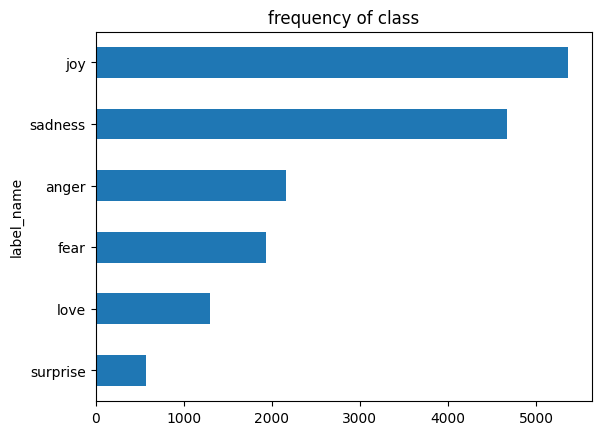

In [201]:
#check class distribution 
import matplotlib.pyplot as plt
df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("frequency of class")
plt.show()

In [202]:
#check lenght of the tweet

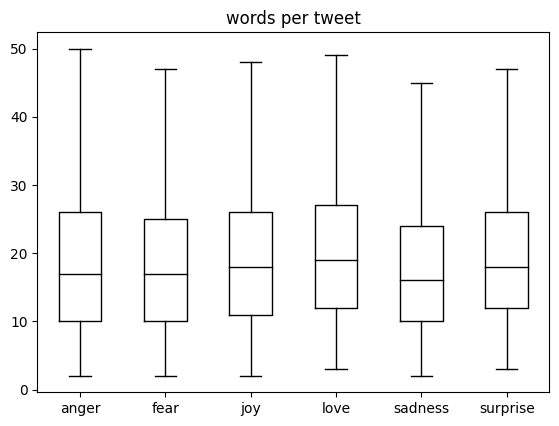

In [203]:
df["words per tweet"]=df["text"].str.split().apply(len)
df.boxplot("words per tweet", by="label_name", grid=False, showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [204]:
#reset dataset format since dataframe is no longer required

In [205]:
emotions.reset_format()

In [206]:
#before feed dataset to model should be TOKENIZED and ENCODED

In [207]:
#eg. tokenization character

In [208]:
text="Tokenizing text is a core task of NPL."
tokenized_text=list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'P', 'L', '.']


In [209]:
#character to integer 1)encoding
token2idx={ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)

{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9, 'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18, 'z': 19}


In [210]:
#character to integer 2)mapping
input_ids=[token2idx[token] for token in tokenized_text]
print(input_ids)

[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7, 14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 4, 2, 1]


In [211]:
#convert coded text into a 2D tensor

In [212]:
categorical_df=pd.DataFrame({"Name": ["Bumblebee", "optimus Prime", "Megatron"], "label ID": [0,1,2]})
categorical_df

,Name,label ID
0,Bumblebee,0
1,optimus Prime,1
2,Megatron,2


In [213]:
pd.get_dummies(categorical_df["Name"])

,Bumblebee,Megatron,optimus Prime
0,True,False,False
1,False,False,True
2,False,True,False


In [214]:
#the two options above are not good since the 1st create a ficticious ordering and the 2nd adding or subtrating two ID is meeaningless 

In [215]:
#to solve the proble two hot encodeds are needed since that indicates that the corresponding tokens "co-occur"

In [216]:
import torch
import torch.nn.functional as F
input_ids=torch.tensor(input_ids)
one_hot_encodings=F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encodings.shape

torch.Size([38, 20])

In [217]:
#that means that for each character (38 input tokens) in input_ids a one-hot vector of 20 dimentions is created 
#(one dimension per character coded in token2idx)

##### character tokenization is good to capture information of for example rare words and word by word tokenization is more efficient keeping the relation betwen words but the vectors could grow up to billions of dimenssions

##### Subword tokenization

###### is to combine the best aspects of character and word tokenization (char - manage complex words and misspelling) (word- keep frequet words as unique entitites to keep the dimenssionaly in a managable size)

In [218]:
#using eg DistilBERT
from transformers import AutoTokenizer
model_ckpt= "distilbert-base-uncased"
tokenizer=AutoTokenizer.from_pretrained(model_ckpt)

In [219]:
encoded_text=tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 27937, 2140, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [220]:
tokens=tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'np', '##l', '.', '[SEP]']


In [221]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizing text is a core task of npl. [SEP]


In [222]:
#vocabulary size
tokenizer.vocab_size

30522

In [223]:
#maximum context size
tokenizer.model_max_length

512

In [224]:
#fields the model expect in forward pass
tokenizer.model_input_names

['input_ids', 'attention_mask']

In [225]:
#ALWAYS check when using pretrained models the same tokenizer is used

In [226]:
#Tokenize the whole dataset:
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)
#tokenize a batch of examples, pad the examples with zeros to the size of the logest in the batch and truncate the examples to the meximum context size
print(tokenize(emotions["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [227]:
emotions_encoded=emotions.map(tokenize, batched=True, batch_size=None)

In [228]:
print(emotions_encoded["train"].column_names)

['text', 'label', 'input_ids', 'attention_mask']


In [229]:
#No GPU- model training only classification head and not modify weights of tokenizing, encoding or giden states

In [230]:
from transformers import AutoModel
model_ckpt="distilbert-base-uncased"
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
model=AutoModel.from_pretrained(model_ckpt).to(device)

In [231]:
device

device(type='cuda')

##### example use

In [232]:
text="this is a text"
inputs=tokenizer(text, return_tensors="pt")
print(f"input tensor shape: {inputs['input_ids'].size()}")

input tensor shape: torch.Size([1, 6])


In [233]:
inputs={k:v.to(device) for k,v in inputs.items()}
with torch.no_grad():
    outputs=model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.2535, -0.1091,  0.0759,  ..., -0.1054,  0.2257,  0.4615],
         [-0.7154, -0.2742, -0.0954,  ..., -0.3597,  0.5174,  0.3450],
         [-0.4100, -0.2195,  0.1850,  ..., -0.0136,  0.1607,  1.0422],
         [-0.2523, -0.0254,  0.2472,  ..., -0.1637,  0.0865,  1.0516],
         [-0.0570, -0.1057,  0.0662,  ...,  0.0584,  0.1034,  0.2971],
         [ 0.9184,  0.1577, -0.4105,  ...,  0.1509, -0.7327, -0.1572]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [234]:
def extract_hidden_states(batch):
    inputs={k:v.to(device) for k,v in batch.items() 
            if k in tokenizer.model_input_names}
    with torch.no_grad():
        last_hidden_state=model(**inputs).last_hidden_state
    return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

In [235]:
emotions_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])

In [236]:
emotions_hidden=emotions_encoded.map(extract_hidden_states, batched=True)

In [237]:
emotions_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [238]:
emotions_hidden["train"].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

In [239]:
#hidden states asociated to each tweet ready----> train classifier

In [240]:
#Use hidden states as inputs and labels as targets

In [241]:
import numpy as np
X_train=np.array(emotions_hidden["train"]["hidden_state"])
X_valid=np.array(emotions_hidden["validation"]["hidden_state"])
y_train=np.array(emotions_hidden["train"]["label"])
y_valid=np.array(emotions_hidden["validation"]["label"])
X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

In [242]:
#before training letś visualize the 768 dimenssions of each emmotion reduced to 2D

In [243]:
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler
X_scaled=MinMaxScaler().fit_transform(X_train)
mapper=UMAP(n_components=2, metric="cosine").fit(X_scaled)
df_emb=pd.DataFrame(mapper.embedding_, columns=["X","Y"])
df_emb["label"]=y_train
df_emb.head()

,X,Y,label
0,4.294413,6.858797,0
1,-2.765182,6.254387,0
2,5.065445,3.335840,3
3,-2.370380,3.752347,2
4,-3.259611,4.223158,3


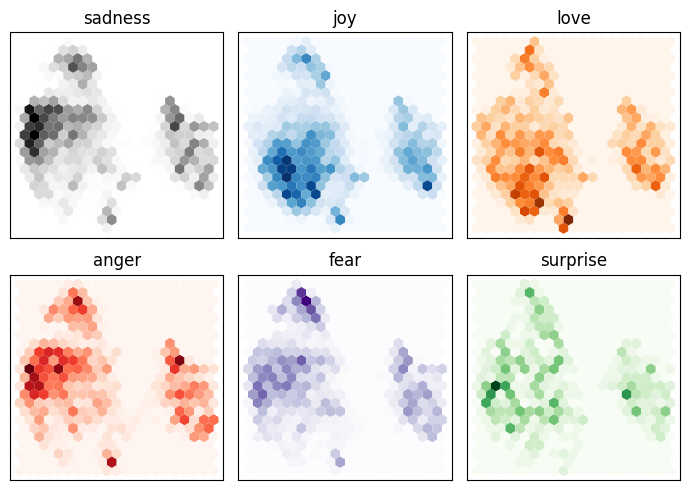

In [244]:
fig, axes=plt.subplots(2,3, figsize=(7,5))
axes=axes.flatten()
cmaps=["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels=emotions["train"].features["label"].names

for i, (label,cmap) in enumerate(zip(labels,cmaps)):
    df_emb_sub=df_emb.query(f"label == {i}")
    axes[i].hexbin(df_emb_sub["X"],df_emb_sub["Y"], cmap=cmap, gridsize=20, linewidths=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])
plt.tight_layout()
plt.show()

##### Training a simple classifier

In [245]:
from sklearn.linear_model import LogisticRegression
lr_clf=LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

0.6335

In [246]:
#compare result to baseline using DummyClassifier
from sklearn.dummy import DummyClassifier
dummy_clf=DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.352

In [247]:
#confusion matrix of the classifier

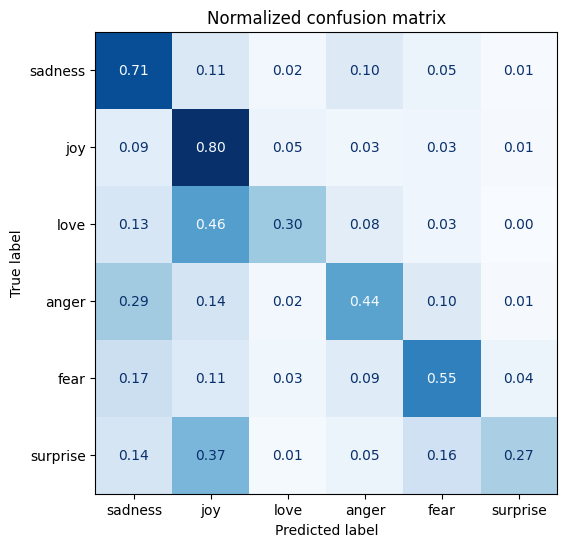

In [248]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
    cm= confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax= plt.subplots(figsize=(6,6))
    disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

y_preds=lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

##### Fine tune transformers end to end GPU - all model parameters trainable not only classification head

In [249]:
from transformers import AutoModelForSequenceClassification
num_labels=6
model=(AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels).to(device))

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias', 'pre_classifier.weight', 'pre_classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [250]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels=pred.label_ids
    preds=pred.predictions.argmax(-1)
    f1=f1_score(labels, preds,average="weighted")
    acc=accuracy_score(labels, preds)
    return{"accuracy":acc , "f1":f1}

In [251]:
#Log into huggingface account to share model mbaarturomata@gmail.com

In [252]:
from huggingface_hub import notebook_login
notebook_login()

In [253]:
from transformers import Trainer, TrainingArguments
batch_size=64
logging_steps=len(emotions_encoded["train"])// batch_size
model_name=f"{model_ckpt}-finetuned-emotion"
training_args= TrainingArguments(output_dir=model_name, num_train_epochs=2, learning_rate=2e-5, 
                                 per_device_train_batch_size=batch_size, per_device_eval_batch_size=batch_size, weight_decay=0.01,
                                 evaluation_strategy="epoch", disable_tqdm=True, log_level="error")

In [254]:
from transformers import Trainer
trainer=Trainer(model=model, args=training_args, compute_metrics=compute_metrics, 
                train_dataset=emotions_encoded["train"], 
                eval_dataset=emotions_encoded["validation"], 
                tokenizer=tokenizer)
trainer.train();

/home/faustus/anaconda3/envs/ml3-8-18/lib/python3.8/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


{'eval_loss': 0.580795407295227, 'eval_accuracy': 0.8135, 'eval_f1': 0.7840160668300656, 'eval_runtime': 5.6901, 'eval_samples_per_second': 351.486, 'eval_steps_per_second': 2.812, 'epoch': 1.0}


/home/faustus/anaconda3/envs/ml3-8-18/lib/python3.8/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


{'eval_loss': 0.3584567904472351, 'eval_accuracy': 0.897, 'eval_f1': 0.8937315260039111, 'eval_runtime': 5.712, 'eval_samples_per_second': 350.143, 'eval_steps_per_second': 2.801, 'epoch': 2.0}
{'train_runtime': 301.1575, 'train_samples_per_second': 106.257, 'train_steps_per_second': 0.83, 'train_loss': 0.7719240112304687, 'epoch': 2.0}


In [ ]:
# # Save the model locally
# trainer.save_model("path/to/save/model")

# from transformers import BertForSequenceClassification, BertTokenizer
# # Load the saved model
# model = BertForSequenceClassification.from_pretrained("path/to/save/model")
# tokenizer = BertTokenizer.from_pretrained("path/to/save/model")

In [255]:
preds_output=trainer.predict(emotions_encoded["validation"])

/home/faustus/anaconda3/envs/ml3-8-18/lib/python3.8/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


In [256]:
preds_output.metrics

{'test_loss': 0.3584567904472351,
 'test_accuracy': 0.897,
 'test_f1': 0.8937315260039111,
 'test_runtime': 5.7574,
 'test_samples_per_second': 347.381,
 'test_steps_per_second': 2.779}

In [257]:
y_preds=np.argmax(preds_output.predictions, axis=1)

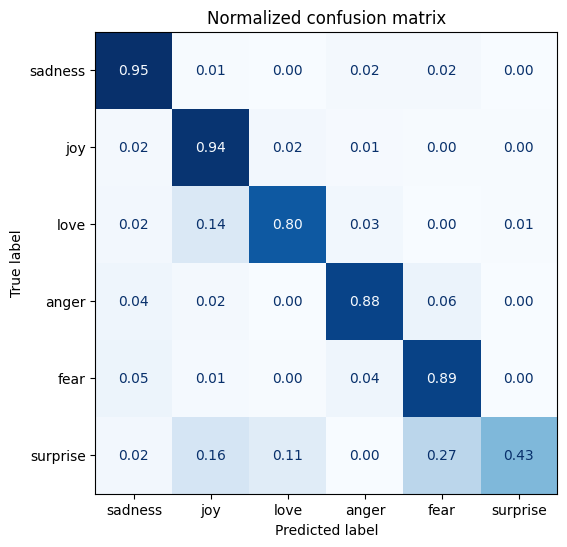

In [258]:
plot_confusion_matrix(y_preds, y_valid, labels)

##### Error analysis 

In [265]:
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
    # Place all input tensors on the same device as the model
    inputs = {k:v.to(device) for k,v in batch.items() 
              if k in tokenizer.model_input_names}

    with torch.no_grad():
        output = model(**inputs)
        pred_label = torch.argmax(output.logits, axis=-1)
        loss = cross_entropy(output.logits, batch["label"].to(device), 
                             reduction="none")

    # Place outputs on CPU for compatibility with other dataset columns   
    return {"loss": loss.cpu().numpy(), 
            "predicted_label": pred_label.cpu().numpy()}

In [266]:
#hide_output
# Convert our dataset back to PyTorch tensors
emotions_encoded.set_format("torch", 
                            columns=["input_ids", "attention_mask", "label"])
# Compute loss values
emotions_encoded["validation"] = emotions_encoded["validation"].map(
    forward_pass_with_label, batched=True, batch_size=16)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [267]:
emotions_encoded.set_format("pandas")
cols = ["text", "label", "predicted_label", "loss"]
df_test = emotions_encoded["validation"][:][cols]
df_test["label"] = df_test["label"].apply(label_int2str)
df_test["predicted_label"] = (df_test["predicted_label"]
                              .apply(label_int2str))

In [269]:
df_test.sort_values("loss", ascending=False).head(10)

,text,label,predicted_label,loss
1801,i feel that he was being overshadowed by the s...,love,sadness,5.536608
882,i feel badly about reneging on my commitment t...,love,sadness,5.356363
1963,i called myself pro life and voted for perry w...,joy,sadness,4.748153
1274,i am going to several holiday parties and i ca...,joy,sadness,4.696497
1950,i as representative of everything thats wrong ...,surprise,sadness,4.657649
765,i feel super awkward and out of place right now,joy,sadness,4.582764
1870,i guess i feel betrayed because i admired him ...,joy,sadness,4.518221
1500,i guess we would naturally feel a sense of lon...,anger,sadness,4.292758
539,i feel i should say what i want since you are ...,joy,anger,4.275105
1683,i had applied for a job and they had assured m...,anger,joy,4.199053


In [270]:
#less loss more confidence

#### Ssving and sharing the model

In [271]:
trainer.push_to_hub(commit_message="Training completed!")

events.out.tfevents.1704592405.navi.6704.1:   0%|          | 0.00/5.56k [00:00<?, ?B/s]

events.out.tfevents.1704592088.navi.6704.0:   0%|          | 0.00/5.51k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

events.out.tfevents.1704668405.navi.11586.0:   0%|          | 0.00/5.51k [00:00<?, ?B/s]

Upload 6 LFS files:   0%|          | 0/6 [00:00<?, ?it/s]

events.out.tfevents.1704661021.navi.4793.0:   0%|          | 0.00/5.51k [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/4.14k [00:00<?, ?B/s]

'https://huggingface.co/faustus24601/distilbert-base-uncased-finetuned-emotion/tree/main/'

In [272]:
from transformers import pipeline
model_id="faustus24601/distilbert-base-uncased-finetuned-emotion"
classifier=pipeline("text-classification", model=model_id)

config.json:   0%|          | 0.00/883 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [273]:
custom_tweet="I saw a movie today and it was really good. "
preds=classifier(custom_tweet, return_all_scores=True)

/home/faustus/anaconda3/envs/ml3-8-18/lib/python3.8/site-packages/transformers/pipelines/text_classification.py:105: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


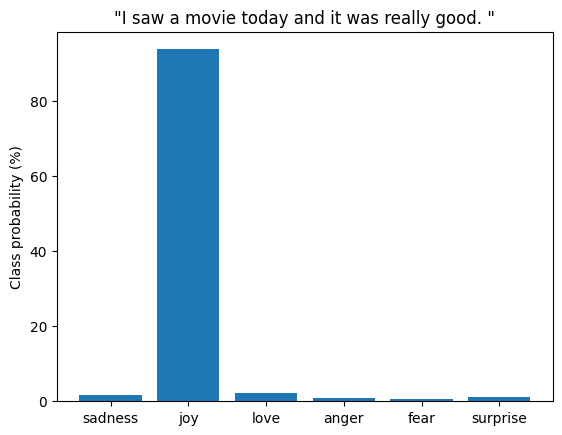

In [277]:
preds_df=pd.DataFrame(preds[0])
plt.bar(labels, 100*preds_df["score"], color="C0")
plt.title(f'"{custom_tweet}"')
plt.ylabel("Class probability (%)")
plt.show()